May 17: Details about coordinates and bathymetry files using the NEMO configuration of the Salish Sea model as an example.

In [3]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

"NEMO has the file names of the coordinates and bathymetry files hard-coded as coordinates.nc and bathy_meter.nc so the files used for a particular run-set need to be copied or symlinked to those names."

http://salishsea-meopar-docs.readthedocs.io/en/latest/code-notes/salishsea-nemo/nemo-forcing/repo.html#repo-contents

### Coordinates File

In [2]:
coord_file = nc.Dataset('/ocean/imachuca/NEMO-forcing/grid/coordinates_seagrid_SalishSea.nc')

In [7]:
coord_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(398), y(898), time(1)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 time(time), int32 time_steps(time), float64 glamt(time,y,x), float64 glamu(time,y,x), float64 glamv(time,y,x), float64 glamf(time,y,x), float64 gphit(time,y,x), float64 gphiu(time,y,x), float64 gphiv(time,y,x), float64 gphif(time,y,x), float64 e1t(time,y,x), float64 e1u(time,y,x), float64 e1v(time,y,x), float64 e1f(time,y,x), float64 e2t(time,y,x), float64 e2u(time,y,x), float64 e2v(time,y,x), float64 e2f(time,y,x)
    groups: 

**glam** - longitude and **gphi** - latitude

In [30]:
all_vars = ['nav_lon','nav_lat', 'time', 'glamu', 'gphiu']

for var in all_vars:
    print(coord_file.variables[var])

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    units: degrees_east
    comment: at t points
unlimited dimensions: 
current shape = (898, 398)
filling off

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
    units: degrees_north
    comment: at t points
unlimited dimensions: 
current shape = (898, 398)
filling off

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: seconds since 0001-01-01 00:00:00
    time_origin: 0000-JAN-01 00:00:00
    calendar: gregorian
unlimited dimensions: time
current shape = (1,)
filling off

<class 'netCDF4._netCDF4.Variable'>
float64 glamu(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off

<class 'netCDF4._netCDF4.Variable'>
float64 gphiu(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [36]:
coord_file.variables['glamu'][:][0]

array([[-123.42677369, -123.42145612, -123.41613854, ..., -121.32633155,
        -121.32101397, -121.3156964 ],
       [-123.42937131, -123.42414766, -123.41888726, ..., -121.32970311,
        -121.32438593, -121.31906875],
       [-123.43206047, -123.42687595, -123.42165337, ..., -121.33307467,
        -121.32775789, -121.32244111],
       ..., 
       [-126.39047305, -126.38481236, -126.37915226, ..., -124.34239023,
        -124.3377412 , -124.33310475],
       [-126.39394632, -126.38825637, -126.38256931, ..., -124.345655  ,
        -124.34102343, -124.33640833],
       [-126.39742443, -126.39169748, -126.38597827, ..., -124.34890314,
        -124.3442892 , -124.33969702]])

In [37]:
coord_file.variables['gphiu'][:][0]

array([[ 46.86060586,  46.86248599,  46.86436606, ...,  47.59813914,
         47.59999329,  47.60184738],
       [ 46.86380068,  46.86579611,  46.86774626, ...,  47.60218286,
         47.60403723,  47.60589153],
       [ 46.86710789,  46.86915121,  46.87114763, ...,  47.60622626,
         47.60808085,  47.60993537],
       ..., 
       [ 50.38294466,  50.38499893,  50.38704278, ...,  51.09480454,
         51.09640584,  51.09800275],
       [ 50.38695017,  50.38901212,  50.39106094, ...,  51.09861007,
         51.10020511,  51.10179442],
       [ 50.39096711,  50.39303804,  50.39509149, ...,  51.10242101,
         51.10400973,  51.10559091]])

**Manual 3.6 pg 54**: In a horizontal plane, the location of all the model grid points is defined from
the analytical expressions of the longitude $\lambda$ and latitude $\phi$ as a function of (i, j).
The horizontal scale factors are calculated using (2.6). For example, when the longitude
and latitude are function of a single value (i and j, respectively) (geographical
configuration of the mesh), the horizontal mesh definition reduces to define the
wanted $\lambda$(i), $\phi$(j), and their derivatives $\lambda$'(i) $\phi$'(j) in the domhgr.F90 module. The
model computes the grid-point positions and scale factors in the horizontal plane
as follows :

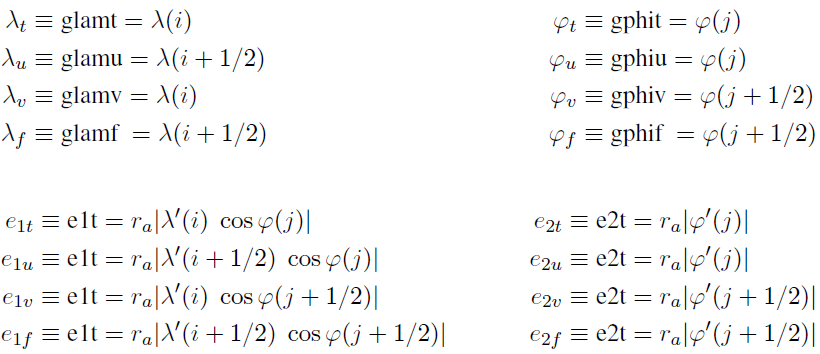

In [2]:
Image(filename='../../images/glam_gphi.png')

### Bathymetry File

In [3]:
bathy_file = nc.Dataset('/ocean/imachuca/NEMO-forcing/grid/bathy_meter_SalishSea.nc')

In [6]:
bathy_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: Salish Sea NEMO Bathymetry
    institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    source: https://bitbucket.org/salishsea/tools/src/tip/bathymetry/SalishSeaBathy.ipynb
    references: https://bitbucket.org/salishsea/nemo-forcing/src/tip/grid/bathy_meter_SalishSea.nc
    comment: Based on 1_bathymetry_seagrid_WestCoast.nc file from 2-Oct-2013 WCSD_PREP tarball provided by J-P Paquin.
    history: 
    [2013-10-30 13:18] Created netCDF4 zlib=True dataset.
    [2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.
    [2013-10-31 17:10] Algorithmic smoothing.
    [2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).
    [2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.
    [2013-11-21 20:47] Removed east end of Jervis Inlet and Toba

In [5]:
bathy_file.dimensions

OrderedDict([('y',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898),
             ('x',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398)])

In [8]:
bathy_file.variables

OrderedDict([('nav_lon', <class 'netCDF4._netCDF4.Variable'>
              float64 nav_lon(y, x)
                  units: degrees east
                  valid_range: [-126.40029144 -121.31835175]
                  long_name: Longitude
              unlimited dimensions: 
              current shape = (898, 398)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('nav_lat', <class 'netCDF4._netCDF4.Variable'>
              float64 nav_lat(y, x)
                  units: degrees north
                  valid_range: [ 46.85966492  51.10480118]
                  long_name: Latitude
              unlimited dimensions: 
              current shape = (898, 398)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('Bathymetry', <class 'netCDF4._netCDF4.Variable'>
              float64 Bathymetry(y, x)
                  _FillValue: 0.0
                  least_significant_digit: 1
                  units: m
             